# A1_V1_Olga_NN_analysis_GVBD

Ver: A1_V2

Author(s) : xx Issac Goh

Date : 220625;YYMMDD

Author notes:

In this module, xxxx

# Interpretation Summary of Colocalisation Analysis Statistics

This document summarizes the meaning and interpretation of the key statistics used to compare real versus random spatial distributions in nearest-neighbor distance (NND) analysis. These metrics are applied both at the **per-experiment level** and **across all experiments** (global summary) to assess whether biological signal points (e.g., transcripts) are spatially closer to comparator populations (e.g., ribosomes) than expected by chance.

## input file guides
files ending in _1 - detected transcript signals
files ending in _1 - detected ribsome signals
files ending in _random - randomly generated transcript signals representing random localisation to be compared to true ribosome signals

---

## Statistical Metrics Used

| Statistic                                            | What it Measures                                                                                                                                                                                               | Interpretation                                                                                                                                                                                                                                                                                |
| ---------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **KS Statistic (Kolmogorov–Smirnov)**                | Measures the **maximum vertical difference** between the cumulative distributions of real and random distances. Sensitive to differences in **distribution shape and location**.                               | A **high KS statistic** with a **very low p-value** (e.g., p < 1e-10) suggests a **statistically significant difference** between distributions. However, this is sensitive to large sample sizes — even small shifts can yield extreme p-values.                                             |
| **Mann–Whitney U Test (MW)**                         | A non-parametric test comparing the **ranks** of values between two distributions. Detects systematic shifts in which one group tends to have smaller values.                                                  | A very low MW p-value (e.g., p < 1e-20) indicates real distances are **consistently smaller** than random distances. Like KS, this test is sensitive to sample size but more interpretable as a shift in central tendency.                                                                    |
| **KL Statistic (Jensen–Shannon Divergence Squared)** | A **bounded, symmetric divergence metric** quantifying the difference in **distribution shape**. Calculated using the **Jensen–Shannon divergence** squared (JSD²), based on binned and normalized histograms. | Ranges from **0 (identical)** to **1 (completely different)**. A value around **0.2–0.4** indicates a **modest but consistent difference** in distribution shape. Less sensitive to sample size than KS/MW. Useful for assessing **practical differences** rather than just statistical ones. |
| **Δ Median (pixels)**                                    | The **difference in median minimum distances** between real and random datasets. Expressed in physical units (e.g., pixels/micrometres).                                                                              | Indicates the **average magnitude** by which real signal points are closer to the comparator population than expected by chance. A small, negative value (e.g., –0.3 µm) is biologically interpretable even if p-values are extreme.                                                          |
| **CLES (Common Language Effect Size)**               | The **probability that a randomly chosen real distance is smaller** than a randomly chosen random distance.                                                                                                    | Values range from **0.5 (no effect)** to **1.0 (perfect separation)**. A value of **0.7–0.8** implies that real distances are smaller than random ones in **70–80% of pairwise comparisons** — this is often more intuitively meaningful than a p-value.                                      |

---

## Per-Experiment vs Global Interpretation

### **Per-Experiment Statistics**

Each experiment provides its own independent set of statistical results:

* **KS and MW tests**: Detect even subtle shifts and yield **extremely small p-values** with large samples — confirm consistent spatial association.
* **KL statistic (JSD²)**: Detects **distribution shape differences** and is less prone to inflation from large N. Helps validate whether significant p-values are also biologically meaningful.
* **ΔMedian**: Converts statistical difference into **real-world spatial distance**.
* **CLES**: Translates effect size into a **probability-based interpretation**.

>  **Interpretation Caveat**:
> Very low p-values (e.g., KS p = 1e-30) do **not** imply large biological effects — they only confirm that a **consistent** difference exists across many points.

---

### **Global Summary Statistics**

These statistics pool data from all experiments to provide a **single, aggregate summary**:

* **Pooled KS/MW tests**: Reveal consistent shifts across all data, controlling for inter-experiment variability.
* **KL statistic (JSD²)**: Assesses whether the **overall shape** of real vs random distributions differs.
* **ΔMedian (pixels)**: Measures **aggregate effect size** across all experiments.
* **CLES**: Offers an intuitive, experiment-wide estimate of spatial enrichment.

---

## Practical Example (Global Summary Table)

| Metric               | Interpretation                                                                                                        |
| -------------------- | --------------------------------------------------------------------------------------------------------------------- |
| `KS p = 1e-24`       | Real and random distance distributions differ significantly across all experiments.                                   |
| `MW p = 1e-31`       | Real distances are consistently smaller than random distances.                                                        |
| `KL (JSD²) = 0.28`   | Real and random distributions differ moderately in shape — confirms a **practical** difference, not just statistical. |
| `ΔMedian = –0.34 pixels` | Real points are on average **0.340 pixels closer** to the comparator population.                                            |
| `CLES = 0.78`        | In 78% of comparisons, real points are closer than random — a strong biological signal.                               |

---

## Final Notes

* Use **KS and MW** to detect shifts in distributions.
* Use **KL (JSD²)** to evaluate **distribution shape differences** and avoid over-interpreting tiny p-values.
* Use **ΔMedian and CLES** for intuitive, real-world interpretation.
* Always contextualize **significance (p-values)** with **magnitude (effect size)** to assess biological relevance.

Experiments:   0%|                                      | 0/3 [00:00<?, ?it/s]

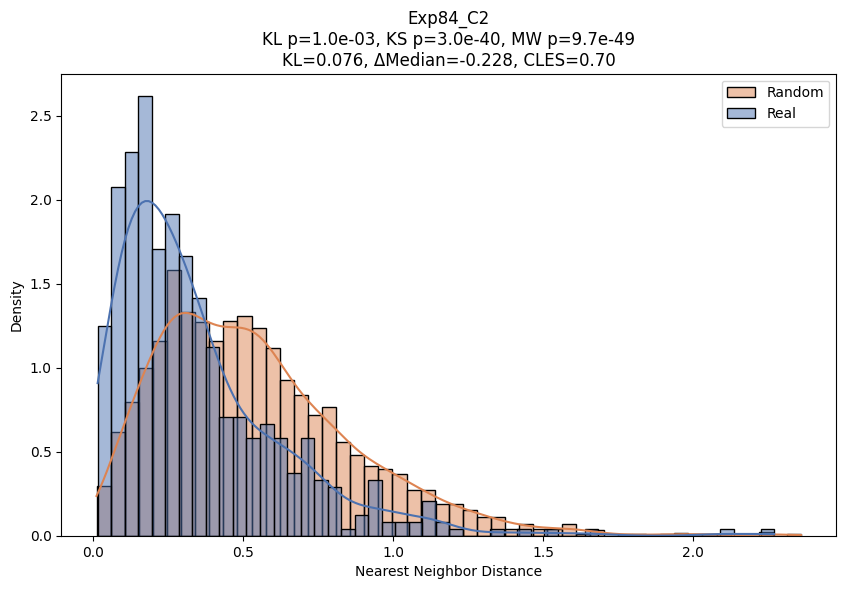

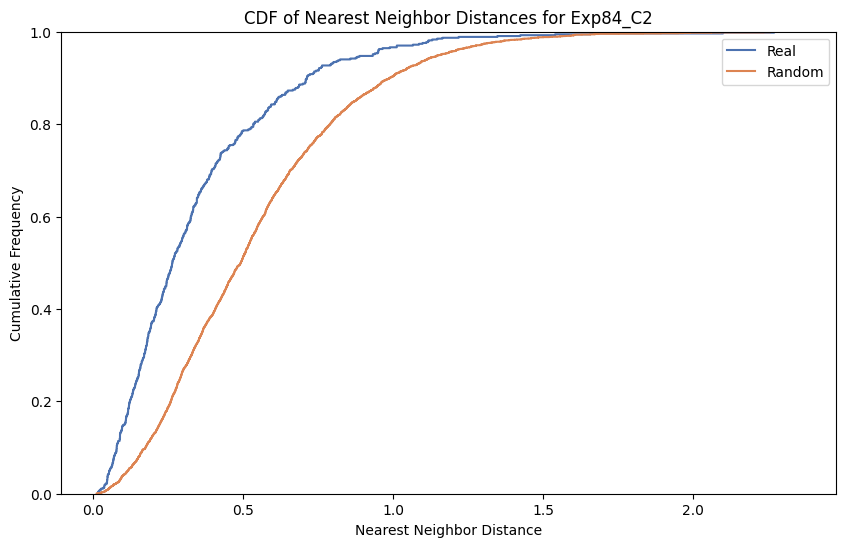

Experiments:  33%|██████████                    | 1/3 [00:01<00:03,  1.86s/it]

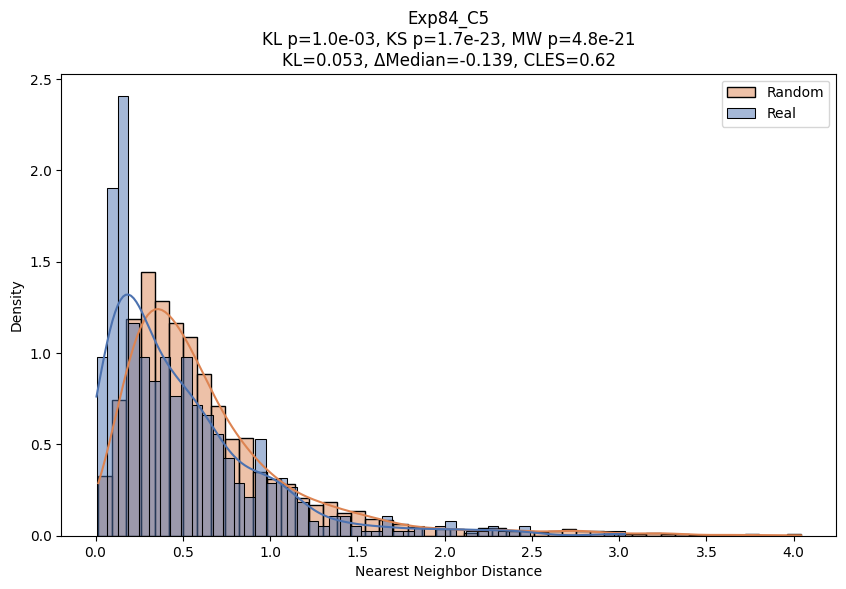

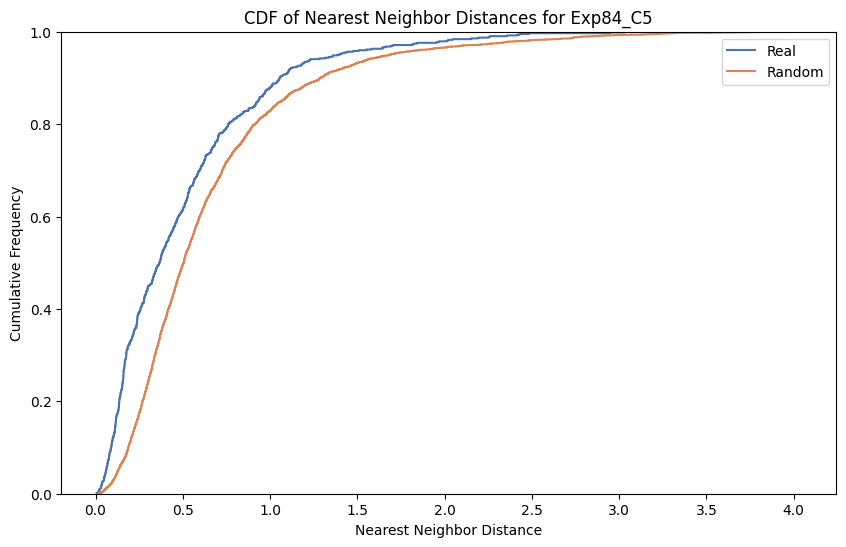

Experiments:  67%|████████████████████          | 2/3 [00:03<00:01,  1.81s/it]

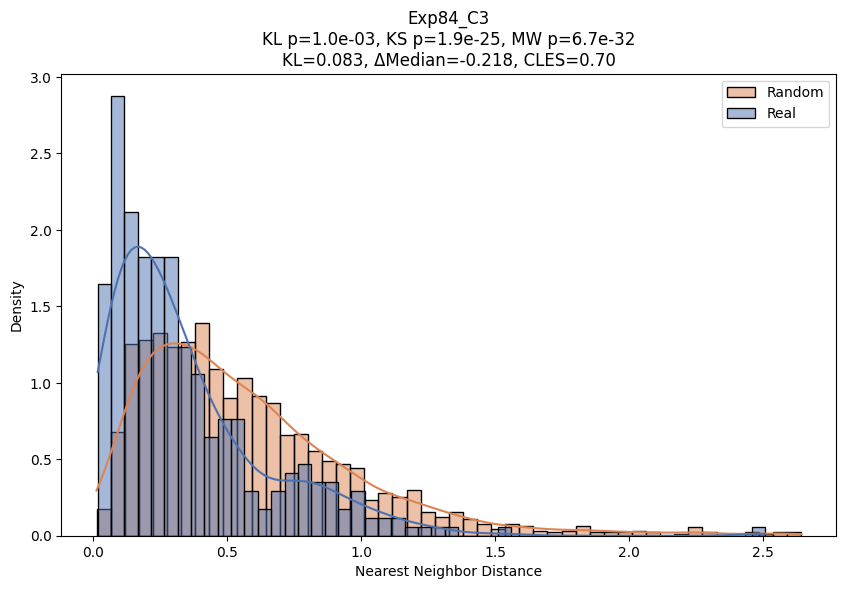

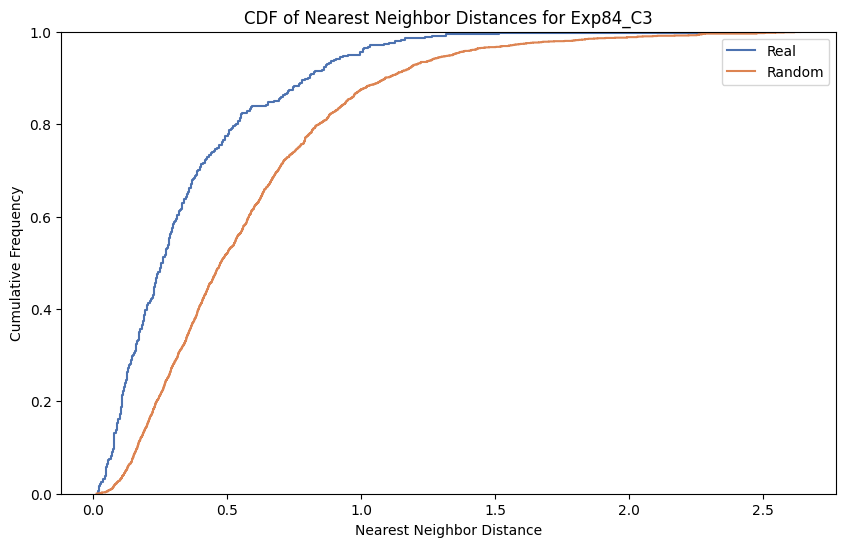

Experiments: 100%|██████████████████████████████| 3/3 [00:05<00:00,  1.68s/it]


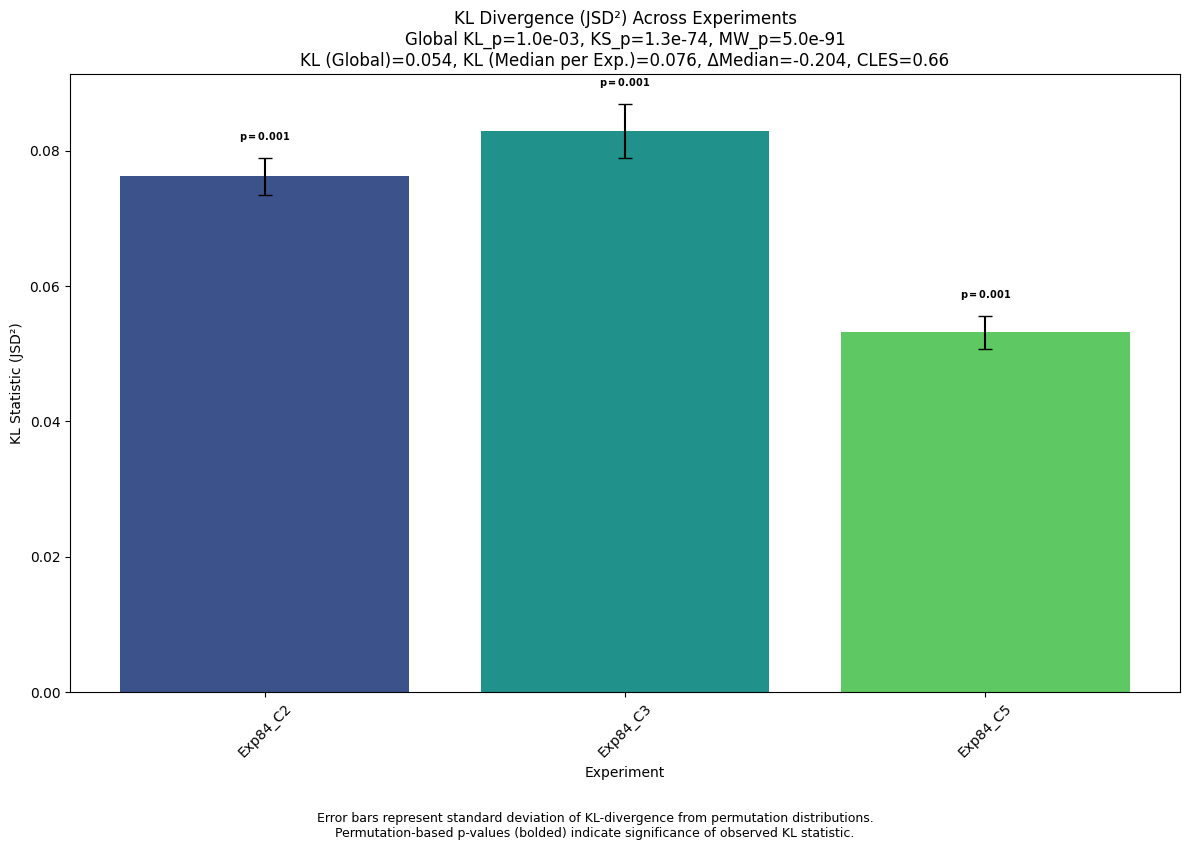

/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_11206/375864109.py:356: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.1`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


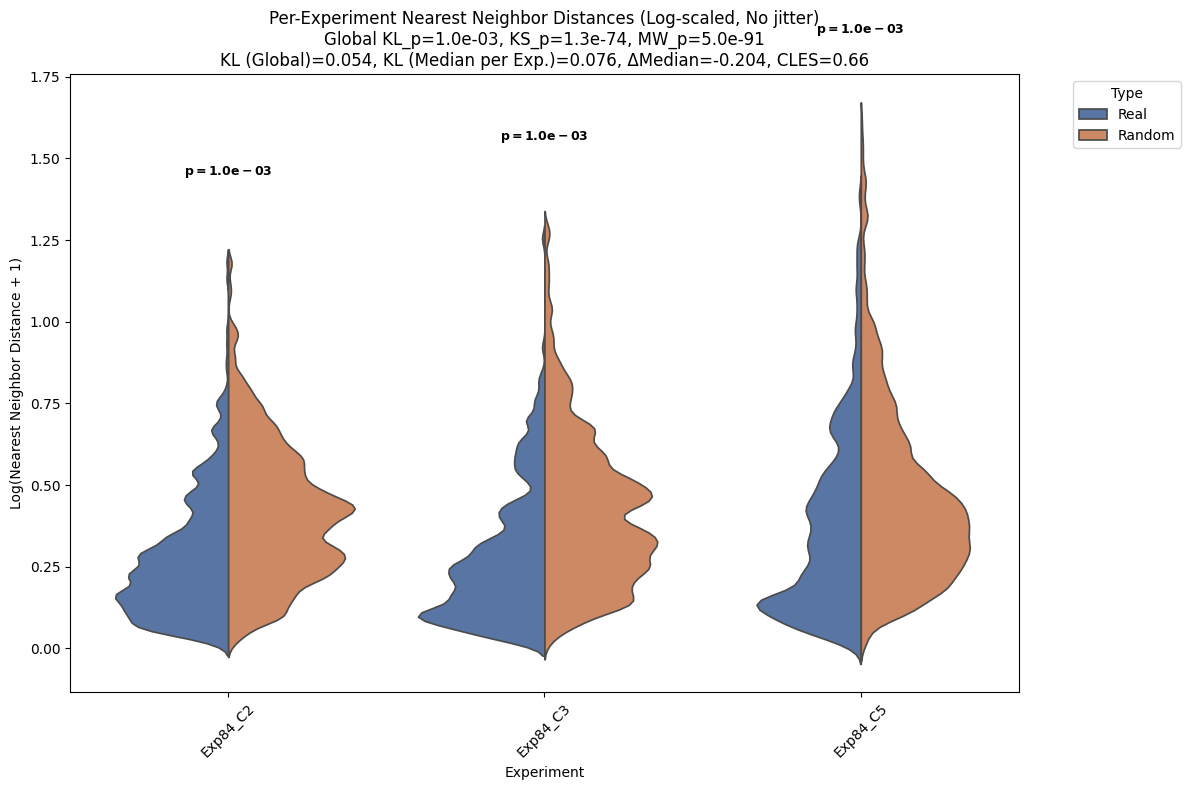

/var/folders/y5/c5y6dnj56fdb64txdrl13lf00000gn/T/ipykernel_11206/375864109.py:398: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.1`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


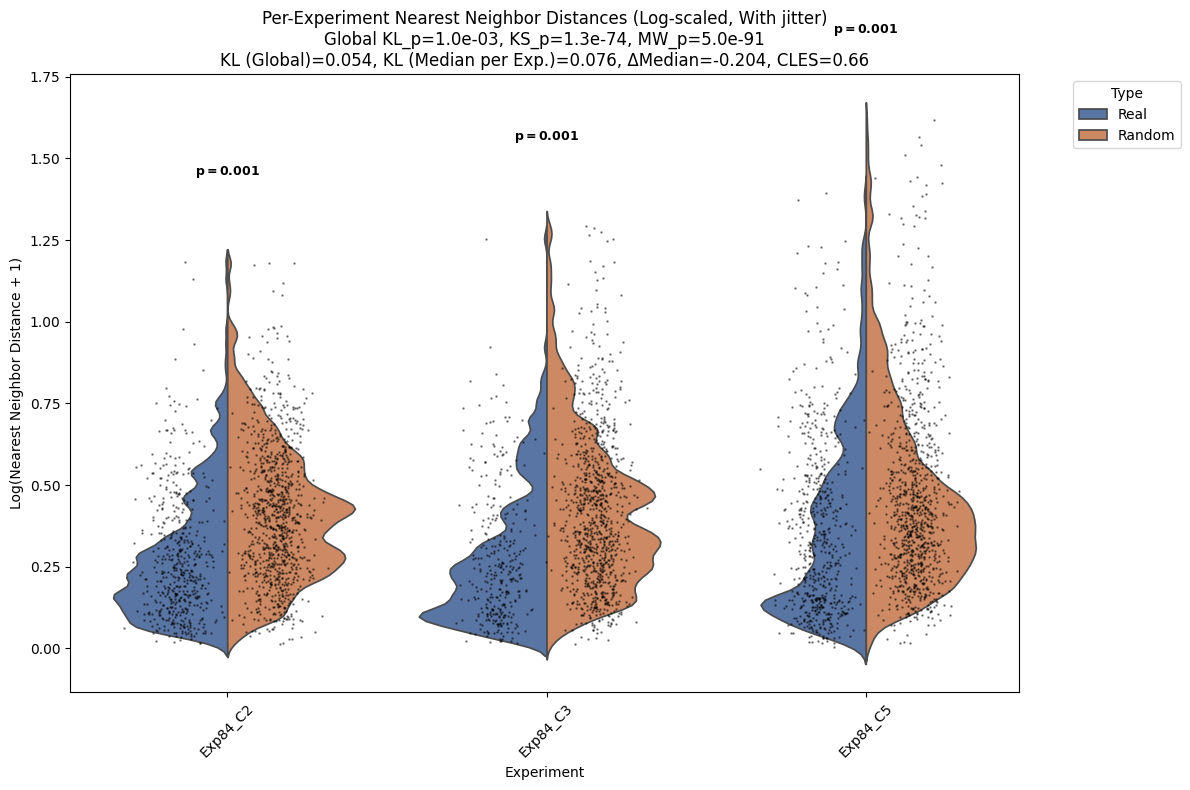

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.stats import ks_2samp, mannwhitneyu
from scipy.stats import ttest_ind
from scipy.spatial.distance import jensenshannon

# --------------------------------
# CONFIGURATION
# --------------------------------
config = {
    'input_path': './data/input/',
    'output_path': './data/output_NN_V4/',
    'random_subset_multiplier': 1,
    'bins': 50,
    'num_permutations': 1000,
    'save_plots': True,
    'show_plots': True,
    'max_swarm_points': 1000  # For efficient swarm plot
}

os.makedirs(config['output_path'], exist_ok=True)

# --------------------------------
# FUNCTION DEFINITIONS
# --------------------------------
def get_distances(df_source, df_target):
    distances = np.sqrt(
        ((df_target[['X', 'Y']].values[:, None] - df_source[['X', 'Y']].values[None, :])**2).sum(-1)
    )
    return pd.DataFrame(distances, columns=[f"{x},{y}" for x, y in df_source[['X', 'Y']].values])

def kl_divergence(real, random, bins):
    hist_real, bin_edges = np.histogram(real, bins=bins, density=True)
    hist_rand, _ = np.histogram(random, bins=bin_edges, density=True)
    hist_real += 1e-10
    hist_rand += 1e-10
    return jensenshannon(hist_real, hist_rand)**2

def permutation_pvalue(real, random, bins, permutations):
    observed_stat = kl_divergence(real, random, bins)
    combined = np.concatenate([real, random])
    n_real = len(real)
    perm_stats = []
    count = 0

    for _ in range(permutations):
        # Proper permutation: shuffle combined data and split into new groups
        permuted = np.random.permutation(combined)
        perm_real = permuted[:n_real]
        perm_random = permuted[n_real:]

        perm_stat = kl_divergence(perm_real, perm_random, bins)
        perm_stats.append(perm_stat)

        if perm_stat >= observed_stat:
            count += 1

    p_value = (count + 1) / (permutations + 1)
    perm_std = np.std(perm_stats)
    return p_value, perm_std

def bootstrap_pvalue(real, random, bins, bootstrap_samples):
    observed_stat = kl_divergence(real, random, bins)
    boot_stats = []

    for _ in range(bootstrap_samples):
        boot_real = np.random.choice(real, size=len(real), replace=True)
        boot_random = np.random.choice(random, size=len(random), replace=True)
        boot_stat = kl_divergence(boot_real, boot_random, bins)
        boot_stats.append(boot_stat)

    boot_stats = np.array(boot_stats)
    p_value = (np.sum(boot_stats >= observed_stat) + 1) / (bootstrap_samples + 1)
    boot_std = np.std(boot_stats)

    return p_value, boot_std

def welch_t_test_log(real, random):
    log_real = np.log1p(real)
    log_random = np.log1p(random)
    stat, p = ttest_ind(log_real, log_random, equal_var=False, alternative='less')
    return stat, p


def perform_tests(real, random, bins, permutations):
    ks_stat, ks_p = ks_2samp(real, random)
    mw_stat, mw_p = mannwhitneyu(real, random, alternative='less')
    kl_stat = kl_divergence(real, random, bins)
    kl_p, kl_perm_std = permutation_pvalue(real, random, bins, permutations)
    median_diff = np.median(real) - np.median(random)
    cles = np.mean(real[:, None] < random)

    # Welch's T-test explicitly on log-transformed data
    welch_stat, welch_p = welch_t_test_log(real, random)

    return {
        'KL_stat': kl_stat, 'KL_p': kl_p, 'KL_perm_std': kl_perm_std,
        'KS_stat': ks_stat, 'KS_p': ks_p,
        'MW_stat': mw_stat, 'MW_p': mw_p,
        'Median_Diff': median_diff, 'CLES': cles,
        'WelchT_stat': welch_stat, 'WelchT_p': welch_p
    }

def annotate_metadata(df_primary, min_distances, random_reference,
                      exp_id, id_label):
    """
    Build a metadata table for either ribosomes or transcripts.

    Parameters
    ----------
    df_primary : pd.DataFrame
        DataFrame containing the original particle rows (ribosomes or transcripts).
    min_distances : array‑like
        Vector of nearest‑neighbour distances for *each* row in df_primary.
    random_reference : np.ndarray
        Distribution of random distances for the current experiment (transcript‑to‑ribosome).
    exp_id : str
        Experiment / image identifier.
    id_label : str
        'Ribo' or 'Tx' – becomes prefix for column names.

    Returns
    -------
    pd.DataFrame   (same length as df_primary)
    """
    df = df_primary.copy()
    df[f'{id_label}_NN_Dist'] = min_distances

    # Empirical p‑value: proportion of random distances that are smaller or equal
    empirical_p = np.searchsorted(np.sort(random_reference),
                                  min_distances, side='right') / (len(random_reference) + 1)
    df[f'{id_label}_EmpP'] = empirical_p

    # Boolean “closer than random” – here: < 5th percentile of the random dist.
    #thresh = np.percentile(random_reference, 5)
    # instead of measuring for 5th percentile, just use the average of random-ribosome ditance as threshold
    thresh = np.mean(random_reference) - np.std(random_reference)
    df[f'{id_label}_CloserThanRand'] = min_distances < thresh

    df['Experiment'] = exp_id
    return df

all_real_distances = []
all_random_distances = []
ribo_meta_list = []  
tx_meta_list   = [] 

# --------------------------------
# MAIN WORKFLOW
# --------------------------------
csv_files = [f for f in os.listdir(config['input_path']) if f.lower().endswith('.csv')]
dfdict = {}
results = {}

for filename in csv_files:
    parts = filename.split("_")
    key = parts[-1].split(".")[0]
    if key not in {"1", "2", "random"}:
        continue
    exp_id = "_".join(parts[:-1])
    df = pd.read_csv(os.path.join(config['input_path'], filename))
    dfdict.setdefault(exp_id, {})[key] = df

for exp_id, dfs in tqdm(dfdict.items(), desc="Experiments"):
    transcripts_df = dfs["1"].dropna(subset=['X', 'Y']).reset_index(drop=True)
    ribosomes_df  = dfs["2"].dropna(subset=['X', 'Y']).reset_index(drop=True)

    # ----- Transcript → ribosome distances (original) -----------------
    real_distances_df = get_distances(transcripts_df, ribosomes_df)
    real_min_distances = real_distances_df.min().values
    all_real_distances.extend(real_min_distances)

    # ----- Random transcript set distances ---------------------------
    random_min_distances = []
    random_sets = (dfs["random"].shape[1] - 1) // 2
    for i in range(random_sets):
        subset = dfs["random"][[f"X{i+1}", f"Y{i+1}"]].dropna().iloc[:len(transcripts_df)
                         * config['random_subset_multiplier']]
        subset.columns = ['X', 'Y']
        random_distances_df = get_distances(subset, ribosomes_df)
        random_min_distances.extend(random_distances_df.min().values)
    random_min_distances = np.array(random_min_distances)
    all_random_distances.extend(random_min_distances)

    # -------------------- NEW: ribosome → transcript ------------------
    ribo_to_tx_df = get_distances(transcripts_df, ribosomes_df)  # rows = ribo
    ribo_min_dists = ribo_to_tx_df.min(axis=1).values

    # -------------------- NEW: metadata tables -----------------------
    ribo_meta = annotate_metadata(ribosomes_df, ribo_min_dists,
                                  random_reference=random_min_distances,
                                  exp_id=exp_id, id_label='Ribo')
    tx_meta   = annotate_metadata(transcripts_df, real_min_distances,
                                  random_reference=random_min_distances,
                                  exp_id=exp_id, id_label='Tx')
    ribo_meta_list.append(ribo_meta)
    tx_meta_list.append(tx_meta)

    # -------------------- existing stats & plots ---------------------
    stats = perform_tests(real_min_distances, random_min_distances,
                          config['bins'], config['num_permutations'])
    results[exp_id] = {'stats': stats,
                       'real': real_min_distances,
                       'random': random_min_distances}

    plt.figure(figsize=(10, 6))
    sns.histplot(random_min_distances, color="#DD8452", label="Random", kde=True, bins=config['bins'], stat="density")
    sns.histplot(real_min_distances, color="#4C72B0", label="Real", kde=True, bins=config['bins'], stat="density")
    plt.title(f"{exp_id}\nKL p={stats['KL_p']:.1e}, KS p={stats['KS_p']:.1e}, MW p={stats['MW_p']:.1e}\n"
              f"KL={stats['KL_stat']:.3f}, ΔMedian={stats['Median_Diff']:.3f}, CLES={stats['CLES']:.2f}")
    plt.xlabel("Nearest Neighbor Distance")
    plt.ylabel("Density")
    plt.legend()
    if config['save_plots']:
        plt.savefig(os.path.join(config['output_path'], f"{exp_id}_Distances.pdf"))
    if config['show_plots']:
        plt.show()
    plt.close()

    # Explicit CDF (survival curve) plot
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(real_min_distances, label="Real", color="#4C72B0")
    sns.ecdfplot(random_min_distances, label="Random", color="#DD8452")
    plt.title(f"CDF of Nearest Neighbor Distances for {exp_id}")
    plt.xlabel("Nearest Neighbor Distance")
    plt.ylabel("Cumulative Frequency")
    plt.legend()
    if config['save_plots']:
        plt.savefig(os.path.join(config['output_path'], f"{exp_id}_CDF_Distances.pdf"))
    if config['show_plots']:
        plt.show()
    plt.close()
    
    # # Delta distances distribution plot
    # plt.figure(figsize=(10, 6))
    # min_len = min(len(real_min_distances), len(random_min_distances))
    # delta = real_min_distances[:min_len] - random_min_distances[:min_len]
    # sns.histplot(delta, kde=True, bins=config['bins'], color="purple")
    # plt.axvline(0, linestyle="--", color="black")
    # plt.title(f"{exp_id} Δ(Real - Random) Distances")
    # plt.xlabel("Distance Difference (Real - Random)")
    # plt.ylabel("Frequency")
    # if config['save_plots']:
    #     plt.savefig(os.path.join(config['output_path'], f"{exp_id}_DeltaDistances.pdf"))
    # if config['show_plots']:
    #     plt.show()
    # plt.close()


stats_df = pd.DataFrame([
    {'Experiment': eid, **res['stats']} for eid, res in results.items()
])
stats_df = stats_df.sort_values(by="Experiment", ascending=True).reset_index(drop=True)


global_stats = perform_tests(
    np.array(all_real_distances), np.array(all_random_distances),
    config['bins'], config['num_permutations']
)

# Compute median KL divergence across experiments explicitly
median_kl_stat = stats_df['KL_stat'].median()

# Updated summary to explicitly include median KL divergence
summary_str = (
    f"Global KL_p={global_stats['KL_p']:.1e}, KS_p={global_stats['KS_p']:.1e}, MW_p={global_stats['MW_p']:.1e}\n"
    f"KL (Global)={global_stats['KL_stat']:.3f}, KL (Median per Exp.)={median_kl_stat:.3f}, "
    f"ΔMedian={global_stats['Median_Diff']:.3f}, CLES={global_stats['CLES']:.2f}"
)


# Final Barplot using permutation distribution error bars with explicit annotation
plt.figure(figsize=(12, 8))
# Explicitly reuse precomputed values from stats_df
bars = plt.bar(
    stats_df['Experiment'], stats_df['KL_stat'],
    yerr=stats_df['KL_perm_std'].values,
    color=sns.color_palette('viridis', len(stats_df)),
    capsize=5
)

for bar, raw_p, err in zip(bars, stats_df['KL_p'], stats_df['KL_perm_std']):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + err + 0.002,
        f'$\mathbf{{p={raw_p:.3f}}}$', ha='center', va='bottom', fontsize=7
    )


plt.title(f"KL Divergence (JSD²) Across Experiments\n{summary_str}")
plt.xlabel("Experiment")
plt.ylabel("KL Statistic (JSD²)")
plt.xticks(rotation=45)

# Explicit error bar definition under the plot
plt.figtext(0.5, -0.05,
            "Error bars represent standard deviation of KL-divergence from permutation distributions.\n"
            "Permutation-based p-values (bolded) indicate significance of observed KL statistic.",
            wrap=True, horizontalalignment='center', fontsize=9)

plt.tight_layout()

if config['save_plots']:
    plt.savefig(os.path.join(config['output_path'], "Overall_KL_Stats.pdf"), bbox_inches='tight')
if config['show_plots']:
    plt.show()
plt.close()


# Prepare explicit split violin data with log-transform
split_data = []

for exp_id, dfs in dfdict.items():
    if not all(key in dfs for key in ["1", "2", "random"]):
        print(f"Skipping {exp_id}: Missing required data.")
        continue  # This needs to be indented under the if condition!

    transcripts_df = dfs["1"].dropna(subset=['X', 'Y'])
    ribosomes_df = dfs["2"].dropna(subset=['X', 'Y'])

    real_distances_df = get_distances(transcripts_df, ribosomes_df)
    real_min_distances = real_distances_df.min()

    random_min_distances = []
    random_sets = (dfs["random"].shape[1] - 1) // 2
    for i in range(random_sets):
        subset = dfs["random"][[f"X{i+1}", f"Y{i+1}"]].dropna().iloc[:len(transcripts_df)*config['random_subset_multiplier']]
        subset.columns = ['X', 'Y']
        random_distances_df = get_distances(subset, ribosomes_df)
        random_min_distances.extend(random_distances_df.min())

    # Log-transform explicitly
    log_real = np.log1p(real_min_distances)
    log_random = np.log1p(random_min_distances)

    split_data.append(pd.DataFrame({
        'Distance': np.concatenate([log_real, log_random]),
        'Type': ['Real'] * len(log_real) + ['Random'] * len(log_random),
        'Experiment': exp_id
    }))

split_df = pd.concat(split_data)

# Explicit subsampling for efficiency
max_points = config['max_swarm_points']
split_df = split_df.groupby(['Experiment', 'Type']).apply(
    lambda x: x.sample(n=min(len(x), max_points), random_state=42)
).reset_index(drop=True)

# Violin plot WITHOUT jitter (Real explicitly on left half)
plt.figure(figsize=(max(12, len(dfdict)*1.5), 8))

sns.violinplot(
    x='Experiment', y='Distance', hue='Type', data=split_df,
    split=True, inner=None,
    palette={"Real": "#4C72B0", "Random": "#DD8452"},
    bw=0.1,
    order=stats_df['Experiment'],
    hue_order=['Real', 'Random']  # Real explicitly on left
)

# Fix legend duplication explicitly
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# KL p-values explicitly consistent with barplot
positions = np.arange(len(dfdict))
for pos, exp_id in enumerate(stats_df['Experiment']):
    pval = stats_df.loc[stats_df['Experiment'] == exp_id, 'KL_p'].values[0]
    max_val = split_df[split_df['Experiment'] == exp_id]['Distance'].max()
    plt.text(
        pos, max_val + 0.25,
        f'$\mathbf{{p={pval:.1e}}}$',
        ha='center', va='bottom', fontsize=9
    )

plt.title(
    "Per-Experiment Nearest Neighbor Distances (Log-scaled, No jitter)\n"
    f"{summary_str}"
)
plt.ylabel("Log(Nearest Neighbor Distance + 1)")
plt.xlabel("Experiment")
plt.xticks(rotation=45)
plt.tight_layout()

if config['save_plots']:
    plt.savefig(os.path.join(config['output_path'], "Per_Experiment_NN_Distances_NO_JITTER.pdf"), bbox_inches='tight')
if config['show_plots']:
    plt.show()
plt.close()

# Violin plot WITH jitter (Real explicitly on left half)
plt.figure(figsize=(max(12, len(dfdict)*1.5), 8))

sns.violinplot(
    x='Experiment', y='Distance', hue='Type', data=split_df,
    split=True, inner=None,
    palette={"Real": "#4C72B0", "Random": "#DD8452"},
    bw=0.1,
    order=stats_df['Experiment'],
    hue_order=['Real', 'Random']  # Real explicitly on left
)

# Explicit jittered black points, centered on each half
for i, exp_id in enumerate(stats_df['Experiment']):
    for j, data_type in enumerate(['Real', 'Random']):
        subset = split_df[(split_df['Experiment'] == exp_id) & (split_df['Type'] == data_type)]
        x_positions = np.random.normal(loc=i - 0.15 if data_type == 'Real' else i + 0.15,
                                       scale=0.05, size=len(subset))
        plt.scatter(
            x_positions, subset['Distance'],
            color='k', alpha=0.4, s=3, marker='.'
        )

# Explicit legend handling
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# KL p-values explicitly consistent with barplot
positions = np.arange(len(dfdict))
for pos, exp_id in enumerate(stats_df['Experiment']):
    pval = stats_df.loc[stats_df['Experiment'] == exp_id, 'KL_p'].values[0]
    max_val = split_df[split_df['Experiment'] == exp_id]['Distance'].max()
    plt.text(
        pos, max_val + 0.25,
        f'$\mathbf{{p={pval:.3f}}}$',
        ha='center', va='bottom', fontsize=9
    )

plt.title(
    "Per-Experiment Nearest Neighbor Distances (Log-scaled, With jitter)\n"
    f"{summary_str}"
)
plt.ylabel("Log(Nearest Neighbor Distance + 1)")
plt.xlabel("Experiment")
plt.xticks(rotation=45)
plt.tight_layout()

if config['save_plots']:
    plt.savefig(os.path.join(config['output_path'], "Per_Experiment_NN_Distances_WITH_JITTER.pdf"), bbox_inches='tight')
if config['show_plots']:
    plt.show()
plt.close()

# Save summary CSV explicitly
stats_df.to_csv(os.path.join(config['output_path'], "All_Experiments_Stats.csv"), index=False)
ribo_meta_df = pd.concat(ribo_meta_list, ignore_index=True)
tx_meta_df   = pd.concat(tx_meta_list,   ignore_index=True)
ribo_meta_df.to_csv(os.path.join(config['output_path'],
                                 "all_ribo_meta.csv"), index=False)
tx_meta_df.to_csv(os.path.join(config['output_path'],
                               "all_tx_meta.csv"),   index=False)


In [2]:
ribo_meta_df

,,Label,Area,Mean,Min,Max,X,Y,%Area,MinThr,MaxThr,Ribo_NN_Dist,Ribo_EmpP,Ribo_CloserThanRand,Experiment
0,1,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.015,339.062,310,366,11.679,21.831,16.495,310,65535,0.510956,0.527892,False,Exp84_C2
1,2,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.085,589.775,317,892,9.403,21.984,91.753,310,65535,0.136741,0.065519,True,Exp84_C2
2,3,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.092,502.219,310,729,12.188,21.538,98.969,310,65535,0.080808,0.023587,True,Exp84_C2
3,4,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.087,525.407,319,705,12.523,21.530,93.814,310,65535,0.414754,0.409210,False,Exp84_C2
4,5,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.029,353.200,312,403,4.344,23.016,30.928,310,65535,3.038307,0.999626,False,Exp84_C2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300,1539,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.077,395.175,310,539,39.051,43.407,82.474,310,65535,0.794259,0.771479,False,Exp84_C3
4301,1540,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.035,377.730,317,433,39.050,44.465,38.144,310,65535,0.951723,0.852133,False,Exp84_C3
4302,1541,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.093,1306.629,762,1823,38.572,44.580,100.000,310,65535,1.419885,0.960257,False,Exp84_C3
4303,1542,MAX_20240816_Exp84_RNA-FISH_Cytb_CF610_MRPL45_...,0.079,1039.439,456,1493,39.891,43.848,84.536,310,65535,0.092634,0.025132,True,Exp84_C3


In [3]:
ribo_meta_df.groupby(['Experiment','Ribo_CloserThanRand']).apply(len)

Experiment  Ribo_CloserThanRand
Exp84_C2    False                   984
            True                    211
Exp84_C3    False                  1429
            True                    112
Exp84_C5    False                  1479
            True                     90
dtype: int64

In [4]:
ribo_meta_df.groupby(['Ribo_CloserThanRand']).apply(len)

Ribo_CloserThanRand
False    3892
True      413
dtype: int64

# Nucleas localisation module

In [5]:
# # ----------------------------------------
# # MODULE: Ribosome-Nucleus Distance Analysis (Updated)
# # ----------------------------------------
# from scipy.stats import wilcoxon
# # CONFIGURATION
# nucleus_config = {
#     'nucleus_suffix': '_nucleus_5.csv',
#     'output_path': './data/output_ribonuc_locale/',
#     'save_plots': True,
#     'show_plots': True,
#     'bins': 50,
#     'use_mean': True  # If False, median+MAD; if True, mean+std
# }

# os.makedirs(nucleus_config['output_path'], exist_ok=True)

# # Data holders
# norm_dists_all = []
# summary_stats = []

# # Helper functions
# def min_max_normalize(distances):
#     min_d, max_d = distances.min(), distances.max()
#     return (distances - min_d) / (max_d - min_d)

# def mad(series):
#     return np.median(np.abs(series - np.median(series)))

# # Process each experiment explicitly sorted by alphabet
# for exp_id, ribo_df in tqdm(sorted(ribo_meta_df.groupby('Experiment')), desc="Nucleus Distance Analysis"):
#     nucleus_file = os.path.join(config['input_path'], f"{exp_id}{nucleus_config['nucleus_suffix']}")
#     if not os.path.exists(nucleus_file):
#         print(f"Nucleus file not found: {nucleus_file}, skipping.")
#         continue

#     nucleus_df = pd.read_csv(nucleus_file).dropna(subset=['X1', 'Y1'])
#     nucleus_df.columns = ['X', 'Y'] + nucleus_df.columns[2:].tolist()

#     dist_matrix = get_distances(ribo_df, nucleus_df)
#     ribo_df['Dist_To_Nucleus'] = dist_matrix.min(axis=0).values
#     ribo_df['Dist_Norm'] = min_max_normalize(ribo_df['Dist_To_Nucleus'])
#     ribo_df['Pairing'] = np.where(ribo_df['Ribo_CloserThanRand'], 'Ribo_transcript_pair', 'Unpaired_Ribo')

#     norm_dists_all.append(ribo_df)

#     # Compute per-image stats
#     summary = ribo_df.groupby('Pairing')['Dist_Norm'].agg(['mean', 'median', 'std', mad]).reset_index()
#     summary['Experiment'] = exp_id
#     summary_stats.append(summary)

#     # Plot per-image histograms explicitly annotated
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=ribo_df, x='Dist_Norm', hue='Pairing', kde=True, bins=nucleus_config['bins'], stat='density', common_norm=False, alpha=0.6)
#     plt.title(f"Normalized Ribosome-Nucleus Distances: {exp_id}")
#     plt.xlabel("Normalized Distance")
#     plt.ylabel("Density")

#     stats_text = summary.to_string(index=False)
#     plt.figtext(0.99, 0.5, stats_text, ha='left', fontsize=8)

#     if nucleus_config['save_plots']:
#         plt.savefig(os.path.join(nucleus_config['output_path'], f"{exp_id}_Ribo_Nucleus_Distances.pdf"), bbox_inches='tight')
#     if nucleus_config['show_plots']:
#         plt.show()
#     plt.close()

# # Compile summaries explicitly into a DataFrame
# summary_df = pd.concat(summary_stats, ignore_index=True)
# summary_df['Pairing'] = summary_df['Pairing'].astype('category').cat.reorder_categories(['Unpaired_Ribo','Ribo_transcript_pair'])
# summary_df.to_csv(os.path.join(nucleus_config['output_path'], "Ribo_Nucleus_Summary_Stats.csv"), index=False)

# # Metric selection explicitly defined
# metric, error = ('mean', 'std') if nucleus_config['use_mean'] else ('median', 'mad')

# # Pivot summaries
# pivot_summary = summary_df.pivot(index='Experiment', columns='Pairing', values=metric)
# pivot_error = summary_df.pivot(index='Experiment', columns='Pairing', values=error)

# # Global summary barplot per image explicitly with chosen metric/error
# ax = pivot_summary.plot(kind='bar', yerr=pivot_error, capsize=4, figsize=(12, 6))
# ax.set_ylabel(f"{metric.capitalize()} Normalized Distance")
# ax.set_title(f"{metric.capitalize()} Normalized Distances per Experiment")
# plt.xticks(rotation=45)

# # Compute global image and ribosome-level stats explicitly
# global_img_stats = pivot_summary.agg(['mean', 'median', 'std']).round(3).to_dict()
# global_img_stats['mad'] = pivot_summary.apply(mad).round(3).to_dict()

# norm_dists_df = pd.concat(norm_dists_all)
# global_ribo_stats_df = norm_dists_df.groupby('Pairing')['Dist_Norm'].agg(['mean', 'median', 'std']).round(3)
# global_ribo_stats_df['mad'] = norm_dists_df.groupby('Pairing')['Dist_Norm'].apply(mad).round(3)
# global_ribo_stats = global_ribo_stats_df.to_dict()

# global_stats_text = (
#     f"Global Image Stats:\n{global_img_stats}\n\n"
#     f"Global Ribosome Stats:\n{global_ribo_stats}"
# )
# plt.figtext(0.99, -0.15, global_stats_text, ha='right', fontsize=9)

# plt.tight_layout()
# plt.savefig(os.path.join(nucleus_config['output_path'], "Summary_Normalized_Distances.pdf"), bbox_inches='tight')
# plt.show()
# plt.close()

# # Delta barplot explicitly with 0 centered
# delta = pivot_summary['Ribo_transcript_pair'] - pivot_summary['Unpaired_Ribo']
# delta_err = pivot_error['Ribo_transcript_pair'] + pivot_error['Unpaired_Ribo']

# plt.figure(figsize=(12, 6))
# plt.bar(delta.index, delta, yerr=delta_err, capsize=4, color='orchid')
# plt.ylabel(f"Delta {metric.capitalize()} Normalized Distance")
# plt.title("Delta per Experiment (Ribo_transcript_pair - Unpaired_Ribo)")
# plt.axhline(0, linestyle='--', color='black')
# plt.xticks(rotation=45)

# # Statistical test explicitly annotated
# stat, pval = wilcoxon(delta)
# delta_stats_text = (
#     f"Wilcoxon p-value={pval:.3e}\n"
#     f"Delta Mean={delta.mean():.3f}, Median={delta.median():.3f}, "
#     f"Std={delta.std():.3f}, MAD={mad(delta):.3f}"
# )
# plt.figtext(0.99, -0.15, delta_stats_text, ha='right', fontsize=9)

# plt.tight_layout()
# plt.savefig(os.path.join(nucleus_config['output_path'], "Delta_Normalized_Distances.pdf"), bbox_inches='tight')
# plt.show()
# plt.close()

# # Global histogram explicitly comparing pairings
# plt.figure(figsize=(10, 6))
# sns.histplot(data=norm_dists_df, x='Dist_Norm', hue='Pairing', kde=True, 
#              bins=nucleus_config['bins'], stat='density', common_norm=False, alpha=0.6)

# stat, global_pval = mannwhitneyu(
#     norm_dists_df.query("Pairing == 'Ribo_transcript_pair'")['Dist_Norm'],
#     norm_dists_df.query("Pairing == 'Unpaired_Ribo'")['Dist_Norm']
# )

# global_hist_stats = norm_dists_df.groupby('Pairing')['Dist_Norm'].agg(['mean', 'median', 'std']).round(3)
# global_hist_stats['mad'] = norm_dists_df.groupby('Pairing')['Dist_Norm'].apply(mad).round(3)

# plt.title(f"Global Normalized Distances Histogram\nMW p-value={global_pval:.3e}")
# plt.xlabel("Normalized Distance")
# plt.ylabel("Density")

# plt.figtext(0.99, -0.15, global_hist_stats.to_string(), fontsize=9, ha='right')

# plt.tight_layout()
# plt.savefig(os.path.join(nucleus_config['output_path'], "Global_Normalized_Distances_Histogram.pdf"), bbox_inches='tight')
# plt.show()
# plt.close()

# # Final Global Norm Barplot
# norm_dists_df_paired = norm_dists_df[norm_dists_df['Pairing'].isin(['Ribo_transcript_pair'])]
# final_global_dist = norm_dists_df_paired['Dist_Norm'].agg(metric).round(3)
# if nucleus_config['use_mean']:
#     final_global_dist_err = norm_dists_df_paired['Dist_Norm'].std().round(3)
# else:
#     final_global_dist_err = mad(norm_dists_df_paired['Dist_Norm']).round(3)


# plt.figure(figsize=(8, 5))
# sns.barplot(
#     x=['Global Norm Distance paired'], y=[final_global_dist],
#     yerr=[final_global_dist_err], palette=['steelblue'], capsize=0.3
# )
# final_norm_stats_text = (
#     f"Mean={norm_dists_df['Dist_Norm'].mean():.3f}, Std={norm_dists_df['Dist_Norm'].std():.3f}, "
#     f"Median={norm_dists_df['Dist_Norm'].median():.3f}, MAD={mad(norm_dists_df['Dist_Norm']):.3f}"
# )
# plt.figtext(0.5, -0.15, final_norm_stats_text, ha='center', fontsize=9)
# plt.title("Global Normalized Distance")
# plt.ylabel(f"{metric.capitalize()} Normalized Distance")
# plt.tight_layout()
# plt.savefig(os.path.join(nucleus_config['output_path'], "Final_Global_Norm_Distance.pdf"), bbox_inches='tight')
# plt.show()
# plt.close()

# # Final Global Delta Barplot explicitly centered at 0
# final_delta = delta.agg(metric).round(3)
# if nucleus_config['use_mean']:
#     final_delta_err = delta.std().round(3)
# else:
#     final_delta_err = mad(delta).round(3)


# max_abs_delta = abs(final_delta) + final_delta_err * 1.5
# plt.figure(figsize=(8, 5))
# sns.barplot(
#     x=['Global Delta'], y=[final_delta],
#     yerr=[final_delta_err], palette=['slategray'], capsize=0.3
# )
# plt.ylim(-max_abs_delta, max_abs_delta)

# final_delta_stats_text = (
#     f"Mean={delta.mean():.3f}, Std={delta.std():.3f}, "
#     f"Median={delta.median():.3f}, MAD={mad(delta):.3f}"
# )

# plt.figtext(0.5, -0.15, final_delta_stats_text, ha='center', fontsize=9)
# plt.title("Global Delta Normalized Distance (Paired - Unpaired)")
# plt.ylabel(f"{metric.capitalize()} Delta Normalized Distance")
# plt.axhline(0, linestyle='--', color='black')
# plt.tight_layout()
# plt.savefig(os.path.join(nucleus_config['output_path'], "Final_Global_Delta.pdf"), bbox_inches='tight')
# plt.show()
# plt.close()


In [6]:
#norm_dists_df = norm_dists_df[norm_dists_df['Pairing'].isin(['Ribo_transcript_pair'])]

In [7]:
#final_global_dist

In [8]:
#summary_df['Pairing'] = summary_df['Pairing'].astype('category').cat.reorder_categories(['Unpaired_Ribo','Ribo_transcript_pair'])